<a href="https://colab.research.google.com/github/Areliortiz/Simulaci-n-/blob/main/Tinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método Analítico

→ Calculamos las funciones, empezando por las pendientes

$
m_1 = \frac{y_2 - y_1}{x_2 - x_1} = \frac{\frac{1}{20} - 0}{210 - 190} = \frac{1}{400}
$

$
m_2 = \frac{y_2 - y_1}{x_2 - x_1} = \frac{0 - \frac{1}{20}}{230 - 210} = -\frac{1}{400}
$
$
→(y - y_1) = m (x - x_1) : $

$(y - 0) = \frac{1}{400}(x - 190) : y = \frac{1}{400}(x - 190)
$

$
\left(y - \frac{1}{20}\right) = -\frac{1}{400}(x - 210) : y = -\frac{1}{400}(x - 210) + \frac{1}{20}
$

----

→ Calculamos el valor esperado: $\mathbb{E}[X] := \int_{-\infty}^{\infty} x f(x) \, dx $

$
\mathbb{E}[X] := \int_{190}^{210} x \frac{1}{400}(x - 190) \, dx = \frac{305}{3}
$

$
\mathbb{E}[X] := \int_{210}^{230} x \left(-\frac{1}{400}(x - 210) + \frac{1}{20}\right) \, dx = \frac{325}{3}
$

$
\mu = 210
$

→ Calculamos la varianza: $\text{Var}(X) := \mathbb{E}[(X - \mu)^2]$

$
\text{Var}(X) := \int_{190}^{210} (x - 210)^2 \left(\frac{1}{400}(x - 190)\right) \, dx = \frac{100}{3}
$

$
\text{Var}(X) := \int_{210}^{230} (x - 210)^2 \left(-\frac{1}{400}(x - 210) + \frac{1}{20}\right) \, dx = \frac{100}{3}
$

$
\sigma^2 = \frac{200}{3}
$

----


Queremos calcular esta probabilidad:
$
P(x_1 + x_2 + x_3 + x_4 + x_5 > 1000) \quad \text{(usamos el teorema central del límite)}
$
$
\left(\lim_{n \to \infty} P\left(\frac{x_1 + \cdots + x_n - n\mu}{\sigma\sqrt{n}} < x\right) = \Phi_x\right) \quad \text{(válido cuando } n \geq 4\text{)}
$

Escribimos:
$
x_1 + x_2 + x_3 + x_4 + x_5  < 1000
$

Ahora multiplicamos $- n\mu$ a ambos lados y dividimos entre $\sigma\sqrt{n}$

$
\\ \frac{x_1 + x_2 + x_3 + x_4 + x_5 - 5 \cdot 210}{\frac{\sqrt{200}}{3}\sqrt{5}} < \frac{1000 - 5 \cdot 210}{\frac{\sqrt{200}}{3}\sqrt{5}}
$

Luego:
$
\frac{x_1 + x_2 + x_3 + x_4 + x_5 - 5 \cdot 210}{\frac{\sqrt{200}}{3}\sqrt{5}} < -2.73
$

Y sustituimos en el teorema:
$
P(z < -2.73) = \Phi(-2.73)
$
y por las tablas de la normal sabemos que esto es  99.7%

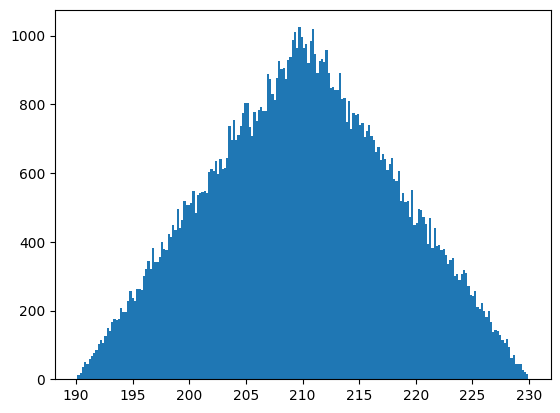

In [53]:
#histograma
import random as rnd
import matplotlib.pyplot as plt
listaa=[]
for i in range (100000):
  u=rnd.uniform(0,1)
  if u<=0.5:
    x=20*(2*u)**0.5 + 190
    listaa.append(x)
  else:
    x=-20*(2*(1-u))**0.5 + 230
    listaa.append(x)
plt.hist(listaa,bins=200)
plt.show()

In [47]:
import random as rnd
import matplotlib.pyplot as plt

def sim_tinas(N, a, b, c):
    costo = 0
    lista = []
    costos = []
    contador = 0

    for i in range(N):
        u_1 = rnd.triangular(a, b, c)
        u_2 = rnd.triangular(a, b, c)
        u_3 = rnd.triangular(a, b, c)
        u_4 = rnd.triangular(a, b, c)
        u_5 = rnd.triangular(a, b, c)

        if u_1 + u_2 + u_3 + u_4 + u_5 > 1000:
            contador += 1
            costo += 200

        prob = contador / (i + 1)
        lista.append(prob)
        costos.append(costo)

    return lista, costos

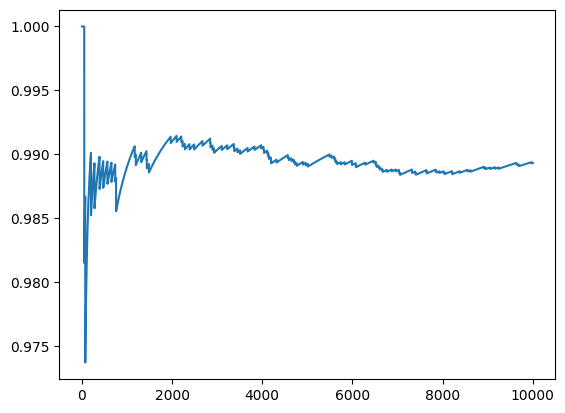

In [48]:
# Gráfica de probabilidad
probabilidades, costos= sim_tinas(N=10000,a=190,b=210,c=220)
plt.plot(probabilidades)

2. EJERCICO.

(a) Resolver analíticamente. \\

5 días x 52 semanasa= 260 días \\
consideramos los 260 dias como nuestro 100%. \\
260 → 100% \\
sabemos que hay una probabilidad de 99.7% de que el peso de las tinas exceda la capacidad del camión por lo que calcularemos los días de que tengamos que contratar un camión \\
260 → 100% \\
x  → 99.7 \\
Usando una regla de 3 tenemos que x= 259, es decir que en 259 dias se contratara un camión \\
El costo anual, si contratamos un camion es de costo = 259 * $200 = $51 800. \\
En comparacion de comprar un nuevo camion anual que es de $600 000. \\
La mejor opcion es contrar el camion si se excede la capacidad de peso.


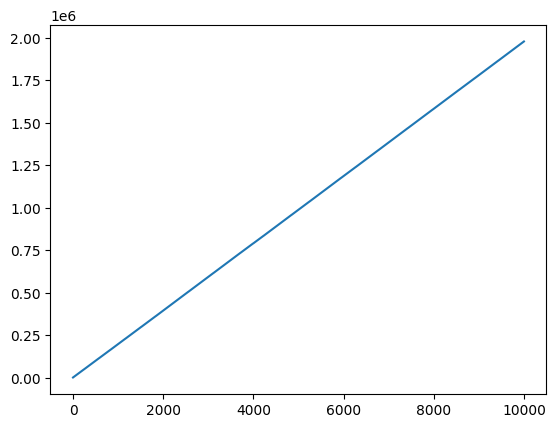

In [49]:
#costos
probabilidades, costos= sim_tinas(N=10000,a=190,b=210,c=220)
plt.plot(costos)
